In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install seaborn

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [23]:
def show_2d_by_feature_indexes(iris, feature_i, feature_j):
    X = iris.data[:, [feature_i, feature_j]] 
    y = iris.target
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    plt.figure(2, figsize=(8, 6))
    plt.clf()

    color = y
    plt.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Set1, edgecolor="k")
    plt.xlabel(iris.feature_names[feature_i])
    plt.ylabel(iris.feature_names[feature_j])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

def show_2d(iris):
    num_of_fetures = iris.data.shape[1]
    for i in range(num_of_fetures):
        for j in range(num_of_fetures):
            if(i < j):
                show_2d_by_feature_indexes(iris, i, j)
                #return # only one 
    plt.show()

In [53]:
#based on:
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
def classify_kneighbors(iris, feature_idx_1, feature_idx_2):
  n_neighbors = 15
  X = iris.data[:, [feature_idx_1, feature_idx_2]]
  y = iris.target

  h = 0.2  # step size in the mesh

  # Create color maps
  cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
  cmap_bold = ["darkorange", "c", "darkblue"]

  # we create an instance of Neighbours Classifier and fit the data.
  clf = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
  clf.fit(X, y)

  # Plot the decision boundary. 
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # area color
  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, cmap=cmap_light)

  #points
  sns.scatterplot(
      x=X[:, 0],
      y=X[:, 1],
      hue=iris.target_names[y],
      palette=cmap_bold,
      alpha=1.0,
      edgecolor="black",
  )
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(
      "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
  )
  plt.xlabel(iris.feature_names[feature_idx_1])
  plt.ylabel(iris.feature_names[feature_idx_2])

  plt.show()

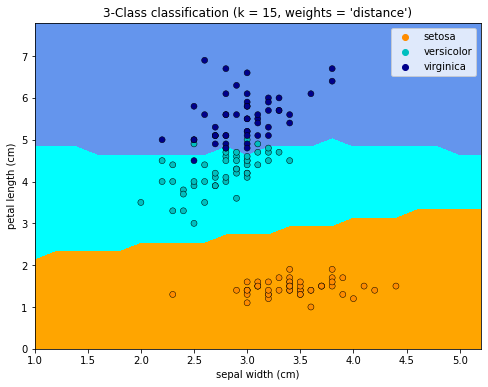

In [54]:
iris = datasets.load_iris()
#show_2d(iris)
classify_kneighbors(iris, feature_idx_1 = 1, feature_idx_2 = 2) #septal width <=> petal length


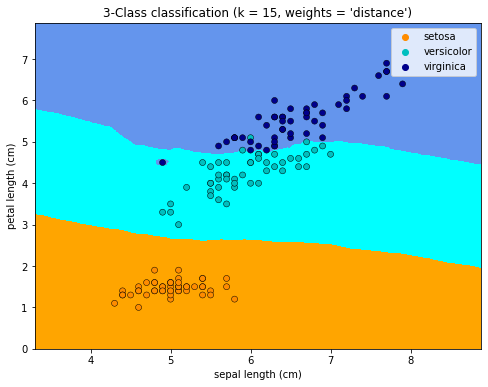

In [48]:
classify_kneighbors(iris, feature_idx_1 = 0, feature_idx_2 = 2) #septal length <=> petal length

In [73]:
def classify_pca_lda(iris):
  #base on https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py
  X = iris.data
  y = iris.target

  pca = PCA(n_components=2) #no need for more
  X_r = pca.fit(X).transform(X)
  plt.figure()
  colors = ["orange", "cyan", "cornflowerblue"]
  lw = 2

  for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
      plt.scatter(
          X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
      )
  plt.legend(loc="best", shadow=False, scatterpoints=1)
  plt.title("PCA of IRIS dataset")
  plt.show()



  lda = LinearDiscriminantAnalysis(n_components=2)
  X_r2 = lda.fit(X, y).transform(X)
  plt.figure()
  for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
      plt.scatter(
          X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
      )
  plt.legend(loc="best", shadow=False, scatterpoints=1)
  plt.title("LDA of IRIS dataset")
  plt.show()

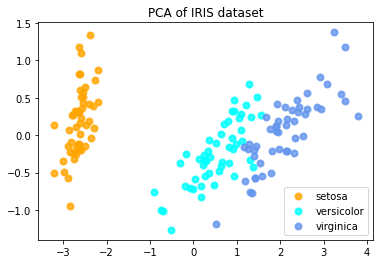

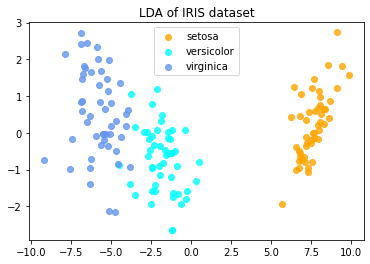

In [74]:
classify_pca_lda(iris)